## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Read Data

In [2]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",30)
pd.set_option("display.max_colwidth",200)

In [3]:
df = pd.read_csv(r"C:\Users\gouri.mohite\ALL PROJECTS\PROJECTS EXCEL FILES\Credit card fraud\fraudTrain.csv")
df.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
578723,578723,2019-09-02 06:02:17,4048508450704760,fraud_Prohaska-Murray,gas_transport,45.87,Cheryl,Melton,F,5053 Bell Crescent Apt. 255,Fullerton,NE,68638,41.3660,-98.0054,1749,"Surveyor, mining",1973-05-07,0a40a0963adbd89ce27efd3425b99a7e,1346565737,41.623102,-98.546112,0
473662,473662,2019-07-27 17:52:17,6011693194885790,fraud_Connelly PLC,food_dining,16.55,Victoria,Fleming,F,2807 Parker Station Suite 080,Stanchfield,MN,55080,45.6675,-93.2433,2607,"Lecturer, further education",1995-12-04,1c8f832236f2926355c8ef95e736c26f,1343411537,45.860514,-92.511815,0
175657,175657,2019-04-01 19:15:14,2264937662466770,fraud_Padberg-Welch,grocery_pos,74.87,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,TX,78214,29.3641,-98.4924,1595797,Land,1995-10-17,9f0f3cf31c7f1ecbc50d945269197fac,1333307714,30.214737,-98.942576,0
224038,224038,2019-04-23 00:45:02,4277232699798846,fraud_Goodwin-Nitzsche,grocery_pos,127.99,Jennifer,Vance,F,13299 Patrick Terrace,Rhame,ND,58651,46.1664,-103.7079,475,Illustrator,1955-11-10,c3ce5babfecfd7a659fc17e7a54e8b4f,1335141902,46.275454,-103.114341,0
957529,957529,2020-01-19 23:19:48,2264937662466770,fraud_Stamm-Rodriguez,misc_pos,7.55,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,TX,78214,29.3641,-98.4924,1595797,Land,1995-10-17,60bb21871a3e522664b2fb612374f81f,1358637588,29.488320,-98.839294,0


In [4]:
# Copy train data in d_train
d_train = df.copy()

## Overview Of Data

In [5]:
df.shape

(1296675, 23)

In [6]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
round(df.isnull().sum()*100/len(df),2).sort_values(ascending=False)

Unnamed: 0               0.0
zip                      0.0
merch_long               0.0
merch_lat                0.0
unix_time                0.0
trans_num                0.0
dob                      0.0
job                      0.0
city_pop                 0.0
long                     0.0
lat                      0.0
state                    0.0
trans_date_trans_time    0.0
city                     0.0
street                   0.0
gender                   0.0
last                     0.0
first                    0.0
amt                      0.0
category                 0.0
merchant                 0.0
cc_num                   0.0
is_fraud                 0.0
dtype: float64

In [9]:
df.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [10]:
# to check duplicates 

len(df[df.duplicated()==True])
# Here we see that there is no duplicates 

0

## Data Preprocessing

In [11]:
# Change datatype of column --> object with datetime

df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"], format='%Y-%m-%d %H:%M:%S.%f')
print(df["trans_date_trans_time"].dtype)

datetime64[ns]


In [12]:
print(df["trans_date_trans_time"].dtype)

datetime64[ns]


In [13]:
# convert datetime into day name and create column Day

df["Day"] = df["trans_date_trans_time"].dt.day_name()
df["Day"]

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1296670     Sunday
1296671     Sunday
1296672     Sunday
1296673     Sunday
1296674     Sunday
Name: Day, Length: 1296675, dtype: object

In [14]:
# convert datetime into hours name and create column Hours

df["Hours"] = df["trans_date_trans_time"].dt.hour
df["Hours"]

0           0
1           0
2           0
3           0
4           0
           ..
1296670    12
1296671    12
1296672    12
1296673    12
1296674    12
Name: Hours, Length: 1296675, dtype: int64

In [15]:
df["Hours"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [16]:
# Partitioning the day into 6 different bins

time = [0,4,8,12,16,20,23]
session = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
df['session'] = pd.cut(df['Hours'], bins=time, labels=session, include_lowest=True)

In [17]:
df["session"]

0          Late Night
1          Late Night
2          Late Night
3          Late Night
4          Late Night
              ...    
1296670       Morning
1296671       Morning
1296672       Morning
1296673       Morning
1296674       Morning
Name: session, Length: 1296675, dtype: category
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Noon' < 'Evening' < 'Night']

In [18]:
df["trans_date_trans_time"].dt.year.unique()

array([2019, 2020], dtype=int64)

In [19]:
# here we drop columns which we could'nt require

df.drop(["Unnamed: 0","cc_num","first","last","street","trans_num","unix_time","zip",],axis=1,inplace=True)

In [20]:
df.head(2)

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,Day,Hours,session
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,Tuesday,0,Late Night
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,Tuesday,0,Late Night


In [21]:
df["dob"] = pd.to_datetime(df["dob"], format='%Y-%m-%d')

In [22]:
# calculating age from the column 'dob' and 'trans_date_trans_time'

df['Age'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year) - ((df['trans_date_trans_time'].dt.month - df['dob'].dt.month) < 0)
df["Age"]

0          30
1          40
2          57
3          52
4          32
           ..
1296670    58
1296671    40
1296672    52
1296673    39
1296674    24
Name: Age, Length: 1296675, dtype: int64

In [23]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = df['lat'], df['long'], df['merch_lat'], df['merch_long']

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


df['dist(km)'] = \
    haversine(df.lat.shift(), df.long.shift(),
                 df.loc[1:, 'lat'], df.loc[1:, 'long'])

In [24]:
df["dist(km)"]

0           593.174456
1          1728.704973
2          6172.384834
3          5643.930319
4          3759.275670
              ...     
1296670    7049.479783
1296671    2297.742415
1296672    4267.035699
1296673    4355.756934
1296674    4715.516574
Name: dist(km), Length: 1296675, dtype: float64

# Exploratory Data Analysis

In [25]:
# collect 10% Sample data out of main dataframe
sample_df = df.sample(int(0.1* len(df)))

In [26]:
sample_df

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,Day,Hours,session,Age,dist(km)
1207643,2020-05-19 15:57:34,fraud_Breitenberg LLC,travel,5.35,F,Lahoma,OK,36.3850,-98.0727,1078,"Programme researcher, broadcasting/film/video",1952-07-06,35.517730,-97.994208,0,Tuesday,15,Noon,67,5521.631976
160544,2019-03-25 23:50:45,"fraud_Turcotte, Batz and Buckridge",health_fitness,10.58,F,Port Gibson,NY,43.0330,-77.1575,207,Database administrator,1962-09-27,43.283365,-76.312217,0,Monday,23,Night,56,3895.269870
361608,2019-06-17 06:10:27,fraud_Ledner-Pfannerstill,gas_transport,74.32,M,Edinburg,VA,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,38.431954,-78.027899,0,Monday,6,Early Morning,71,3315.870127
845353,2019-12-14 18:32:21,fraud_Price Inc,shopping_net,3.32,F,Thrall,TX,30.5920,-97.2893,1766,Press sub,1976-01-02,30.128994,-97.020731,0,Saturday,18,Evening,43,3045.661430
528855,2019-08-16 01:05:39,fraud_Barrows PLC,shopping_pos,41.43,M,Brashear,MO,40.1959,-92.4333,805,Private music teacher,1970-06-27,40.261008,-92.889803,0,Friday,1,Late Night,49,2408.122613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303257,2019-05-27 12:44:30,fraud_Reichel LLC,personal_care,30.47,F,Goodrich,MI,42.9147,-83.4845,6951,Learning disability nurse,1985-06-18,43.498451,-84.241519,0,Monday,12,Morning,33,4906.541952
727674,2019-11-07 04:29:38,"fraud_Mosciski, Gislason and Mertz",grocery_pos,93.41,F,Paradise Valley,AZ,33.5494,-111.9565,17047,Building surveyor,1935-01-29,33.536580,-112.653957,0,Thursday,4,Late Night,84,2312.950504
413675,2019-07-06 12:12:58,"fraud_Okuneva, Schneider and Rau",shopping_pos,21.18,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.483967,-73.150340,0,Saturday,12,Morning,48,2658.836020
498584,2019-08-04 23:23:11,"fraud_Zemlak, Tillman and Cremin",personal_care,78.68,F,Moundsville,WV,39.9148,-80.7310,16183,Physiotherapist,1977-08-12,39.909462,-80.321441,0,Sunday,23,Night,42,1556.233416


<AxesSubplot:xlabel='lat', ylabel='long'>

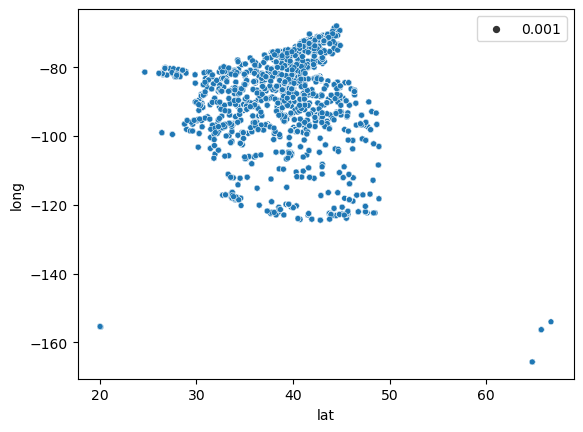

In [29]:
# plt.figure(figsize = (15,8))
sns.scatterplot(x = sample_df.lat, y = sample_df.long, size = 0.001)

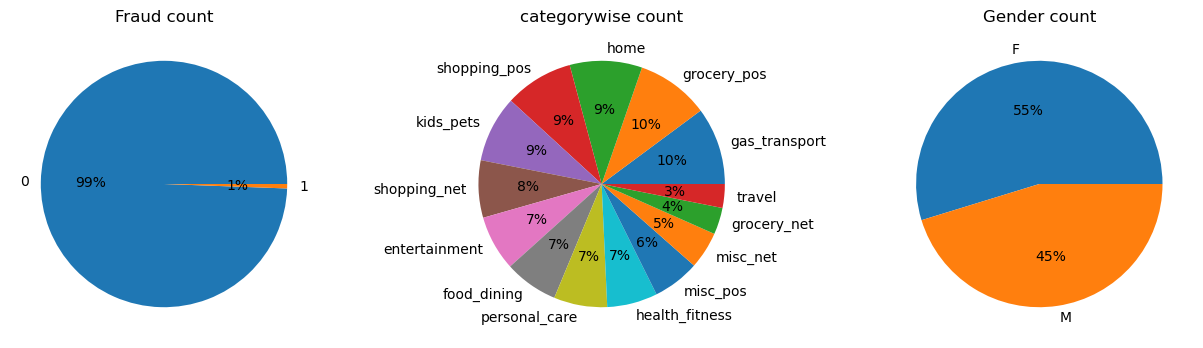

In [30]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.title("Fraud count")
plt.pie(df.is_fraud.value_counts(),labels=df.is_fraud.value_counts().index,autopct='%.0f%%')

plt.subplot(1,3,2)
plt.title("categorywise count")
plt.pie(df.category.value_counts(),labels=df.category.value_counts().index,autopct='%.0f%%')

plt.subplot(1,3,3)
plt.title("Gender count")
plt.pie(df.gender.value_counts(),labels=df.gender.value_counts().index,autopct='%.0f%%')
plt.show()

*  Here we see that there is imbalance data. 99% data is non-fraud and 1% data is fraud.
*  From 2nd pie chart we see that credit card is mostly used in 
   gas_transport, grocery_pos and home category.And less used in travel. 
*  In Total credit card transaction percentage of Female users are more than male user.

In [31]:
age = [13,19,39,59,80,100]
stages = ['Teen', 'Adult','Midd Age Adult','Senior Adult','Old Age']
df['Age_range'] = pd.cut(df['Age'], bins=age, labels=stages, include_lowest=True)

In [32]:
fraud_0 = df[df["is_fraud"] == 0]
fraud_1 = df[df["is_fraud"] == 1]

print("No. of fraud: ",fraud_1.shape[0])
print("No. of non-fraud: ",fraud_0.shape[0])

No. of fraud:  7506
No. of non-fraud:  1289169


In [33]:
df["Age"].unique()

array([30, 40, 57, 52, 32, 25, 71, 77, 44, 28, 29, 73, 51, 53, 66, 80, 72,
       38, 56, 47, 54, 41, 48, 34, 20, 31, 46, 59, 65, 24, 76, 42, 37, 92,
       82, 21, 63, 35, 18, 61, 64, 83, 43, 23, 91, 90, 68, 60, 67, 33, 58,
       17, 89, 55, 70, 50, 45, 19, 15, 62, 49, 88, 78, 84, 26, 36, 79, 14,
       27, 81, 39, 85, 22, 74, 69, 75, 86, 87, 94, 93, 16, 95],
      dtype=int64)

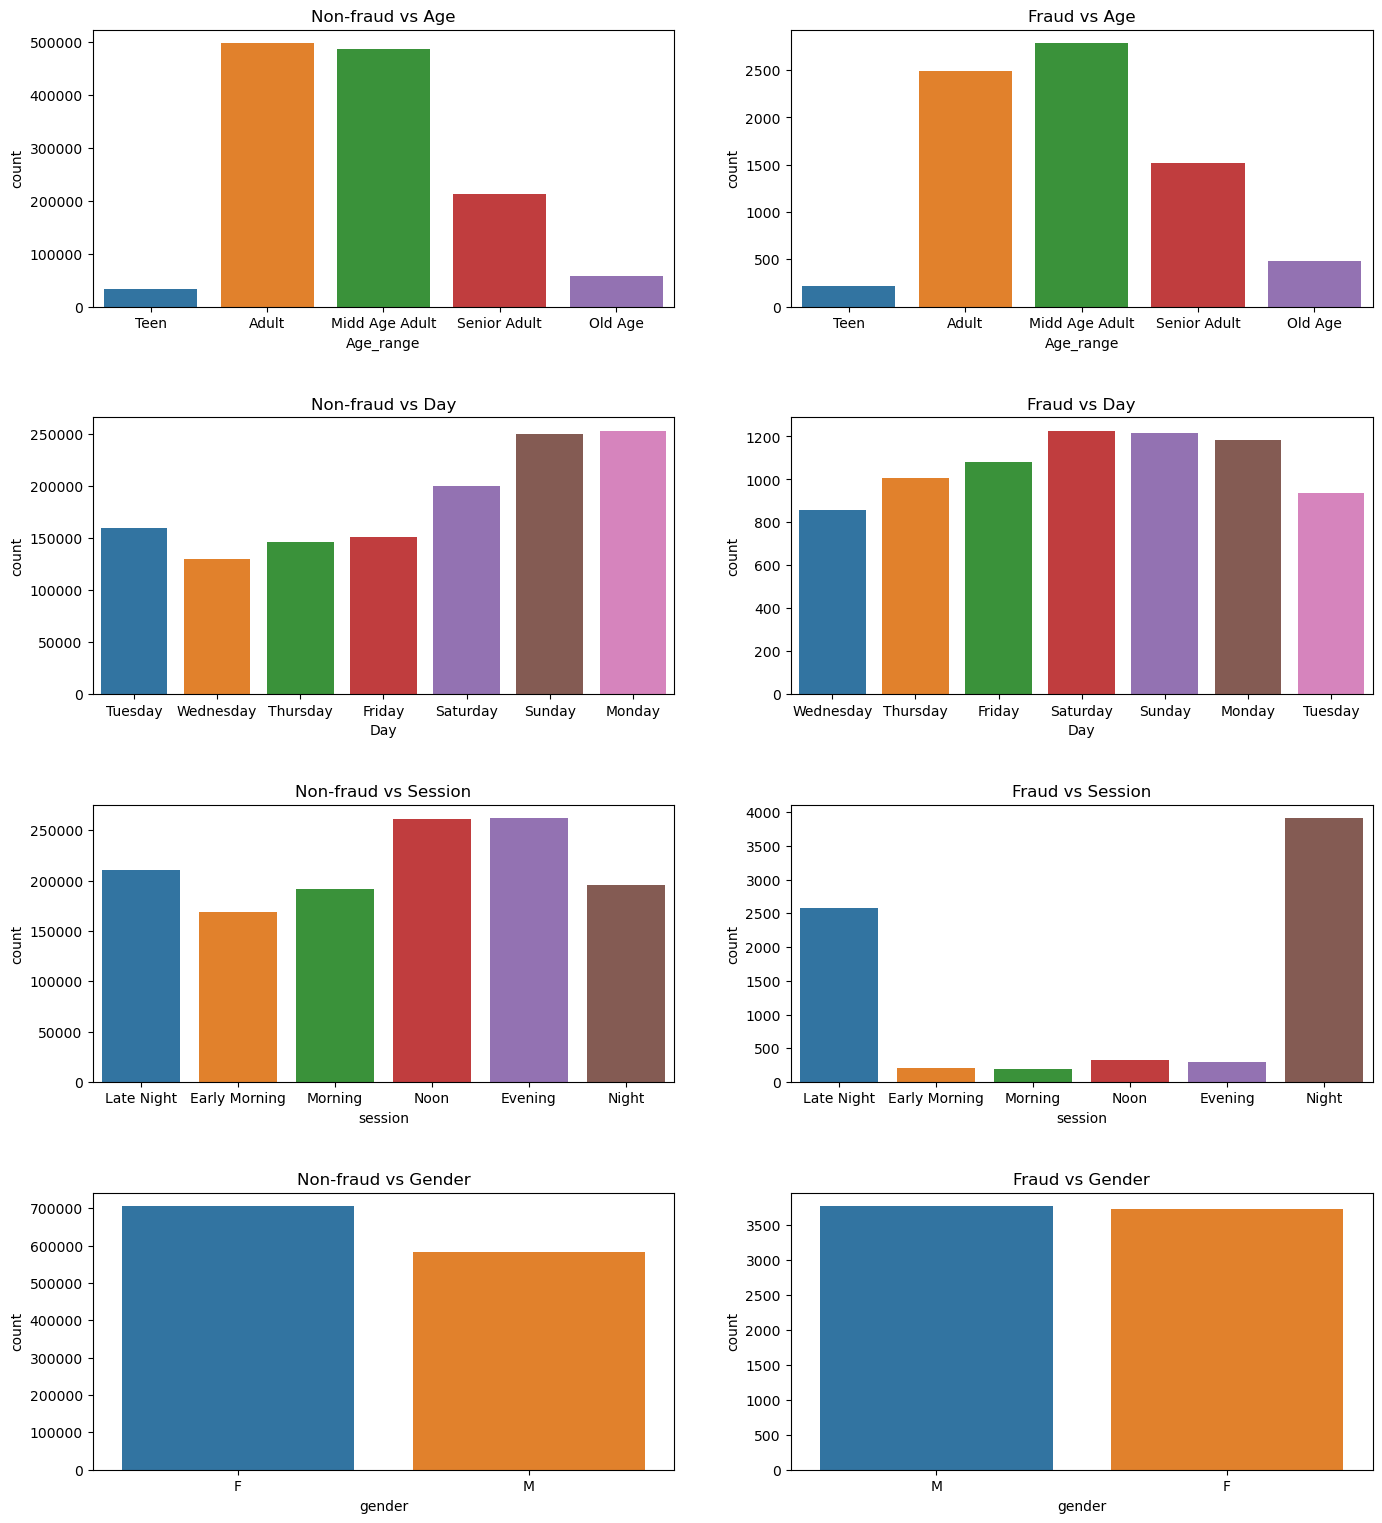

In [34]:
plt.figure(figsize=(16,18))

plt.subplot(4,2,1)
plt.title("Non-fraud vs Age")
sns.countplot(x=fraud_0["Age_range"])

plt.subplot(4,2,2)
plt.title("Fraud vs Age")
sns.countplot(fraud_1["Age_range"])

plt.subplot(4,2,3)
plt.title("Non-fraud vs Day")
sns.countplot(fraud_0["Day"])

plt.subplot(4,2,4)
plt.title("Fraud vs Day")
sns.countplot(fraud_1["Day"])

plt.subplot(4,2,5)
plt.title("Non-fraud vs Session")
sns.countplot(fraud_0["session"])

plt.subplot(4,2,6)
plt.title("Fraud vs Session")
sns.countplot(fraud_1["session"])

plt.subplot(4,2,7)
plt.title("Non-fraud vs Gender")
sns.countplot(fraud_0["gender"])

plt.subplot(4,2,8)
plt.title("Fraud vs Gender")
sns.countplot(fraud_1["gender"])

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)
plt.show()

* Maximum frauds was done with Midd Adult age group and Adult age group.
* Most credit card fraud was happens in Saturday and Sunday on weekend compared to weekdays.
* Maximum credit card fraud happens in Night and Late Night.
* Credit card fraud is independent on Gender OR No effect of gender on fraud and non-fraud data.

# Bivariate Analysis

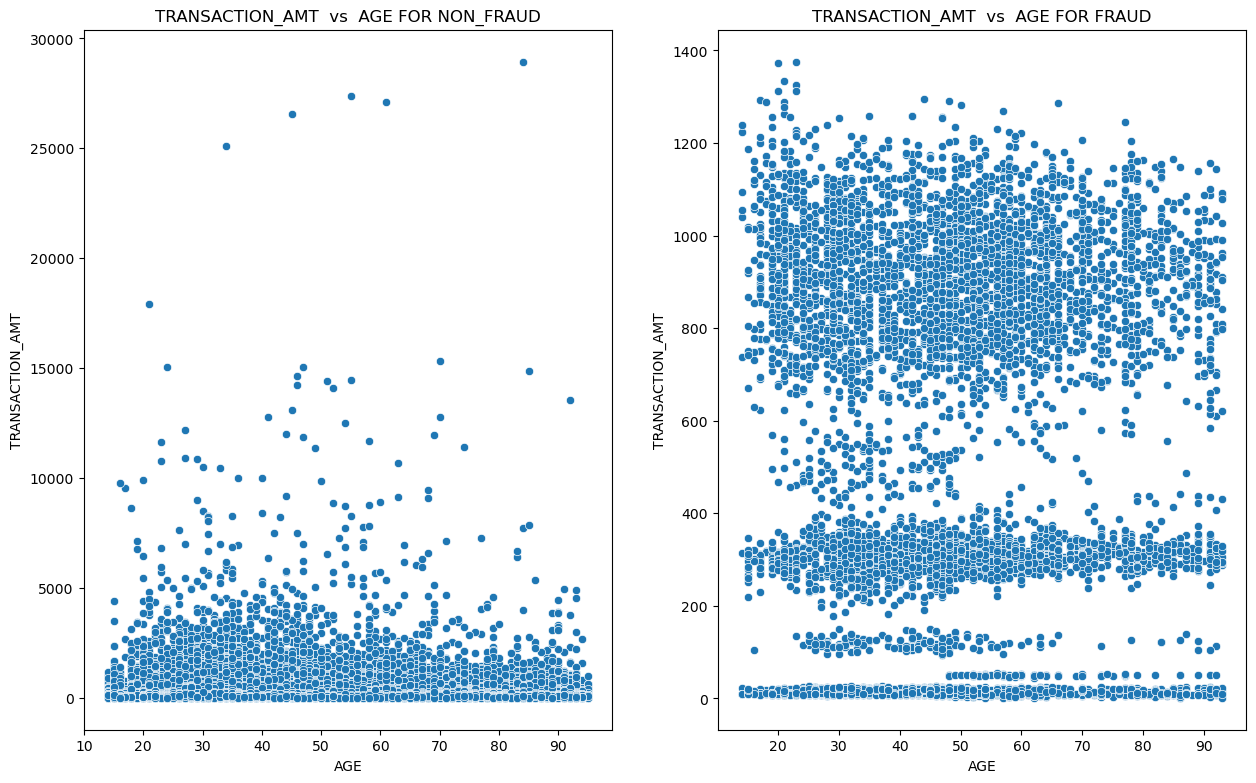

In [35]:
#Scatter plot for numeric columns

plt.figure(figsize = (15, 20))

plt.subplot(2,2,1)
sns.scatterplot(fraud_0.Age,fraud_0.amt)
plt.ylabel('TRANSACTION_AMT')
plt.xlabel('AGE')
plt.title('TRANSACTION_AMT  vs  AGE FOR NON_FRAUD')

plt.subplot(2,2,2)
sns.scatterplot(fraud_1.Age,fraud_1.amt)
plt.ylabel('TRANSACTION_AMT')
plt.xlabel('AGE')
plt.title('TRANSACTION_AMT  vs  AGE FOR FRAUD')

plt.show()

* No. of Credit card fraud is directly proportional to transaction amount.
  Max transaction amount more possibility of fraud.

### Top Ten Fraud Merchant

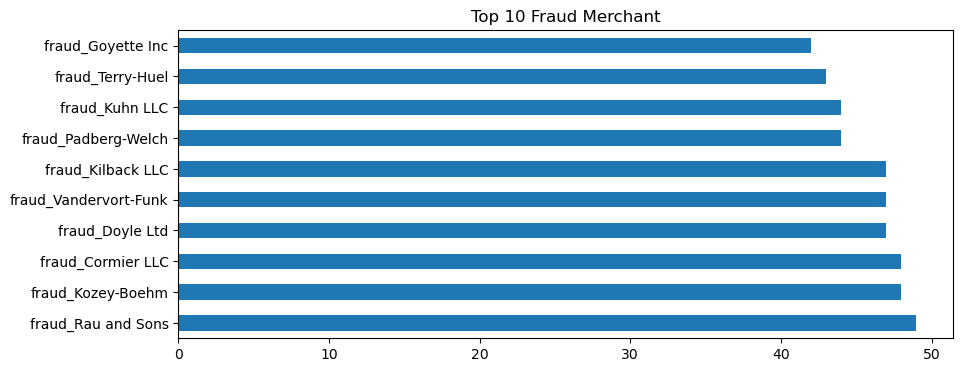

In [36]:
plt.figure(figsize=(10,4))
plt.title("Top 10 Fraud Merchant")
fraud_1["merchant"].value_counts().sort_values(ascending=False).head(10).plot(kind="barh")
plt.show()

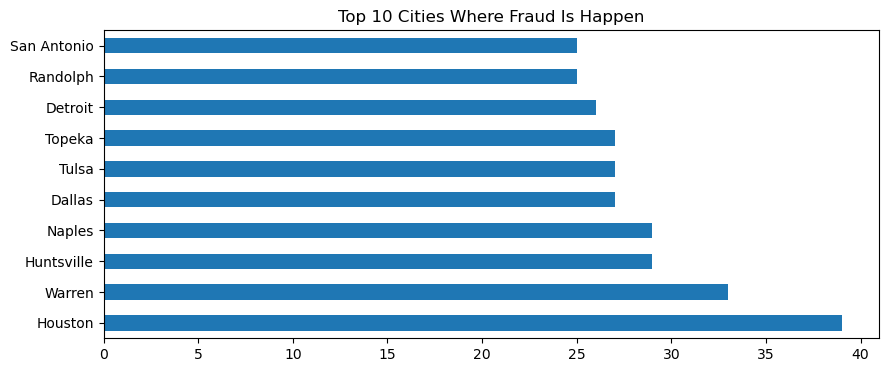

In [37]:
plt.figure(figsize=(10,4))
plt.title("Top 10 Cities Where Fraud Is Happen")
fraud_1["city"].value_counts().sort_values(ascending=False).head(10).plot(kind="barh")
plt.show()

* Most Fruad is happen in Houston city

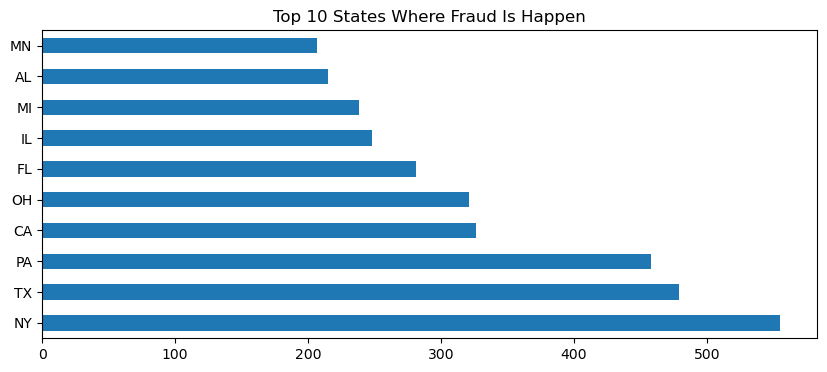

In [38]:
plt.figure(figsize=(10,4))
plt.title("Top 10 States Where Fraud Is Happen")
fraud_1["state"].value_counts().sort_values(ascending=False).head(10).plot(kind="barh")
plt.show()

* Most Fruad is happen in NY(New York) state

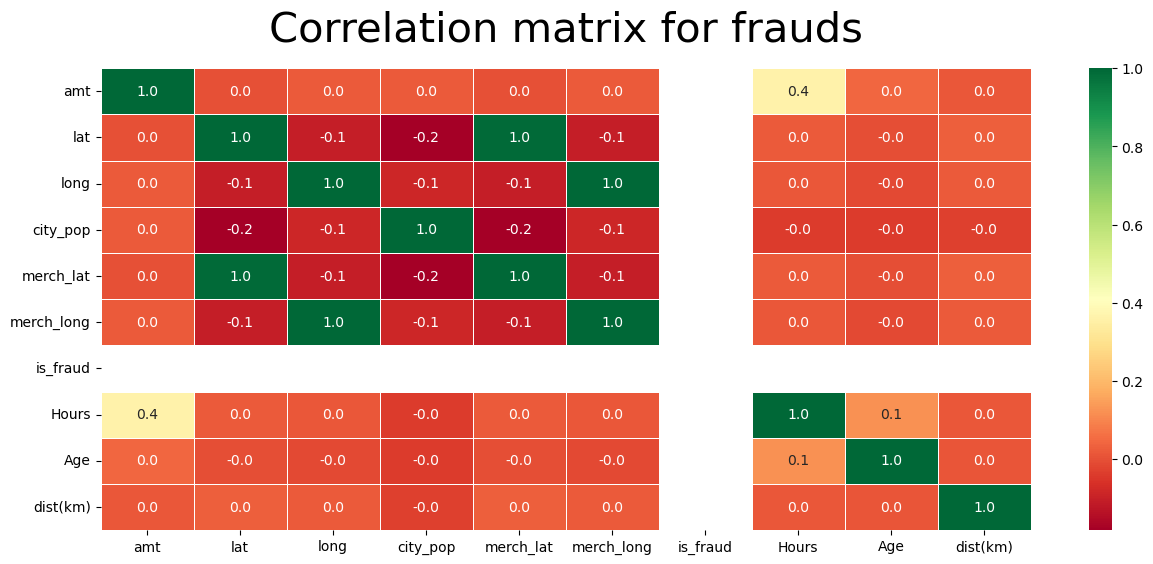

In [39]:
plt.figure(figsize=(15,6))
sns.heatmap(fraud_1.corr(),fmt=".1f",annot=True,cmap="RdYlGn",linewidths=.5)
plt.title("Correlation matrix for frauds",fontsize=30,pad=20)
plt.show()

### Boxplot for whole data

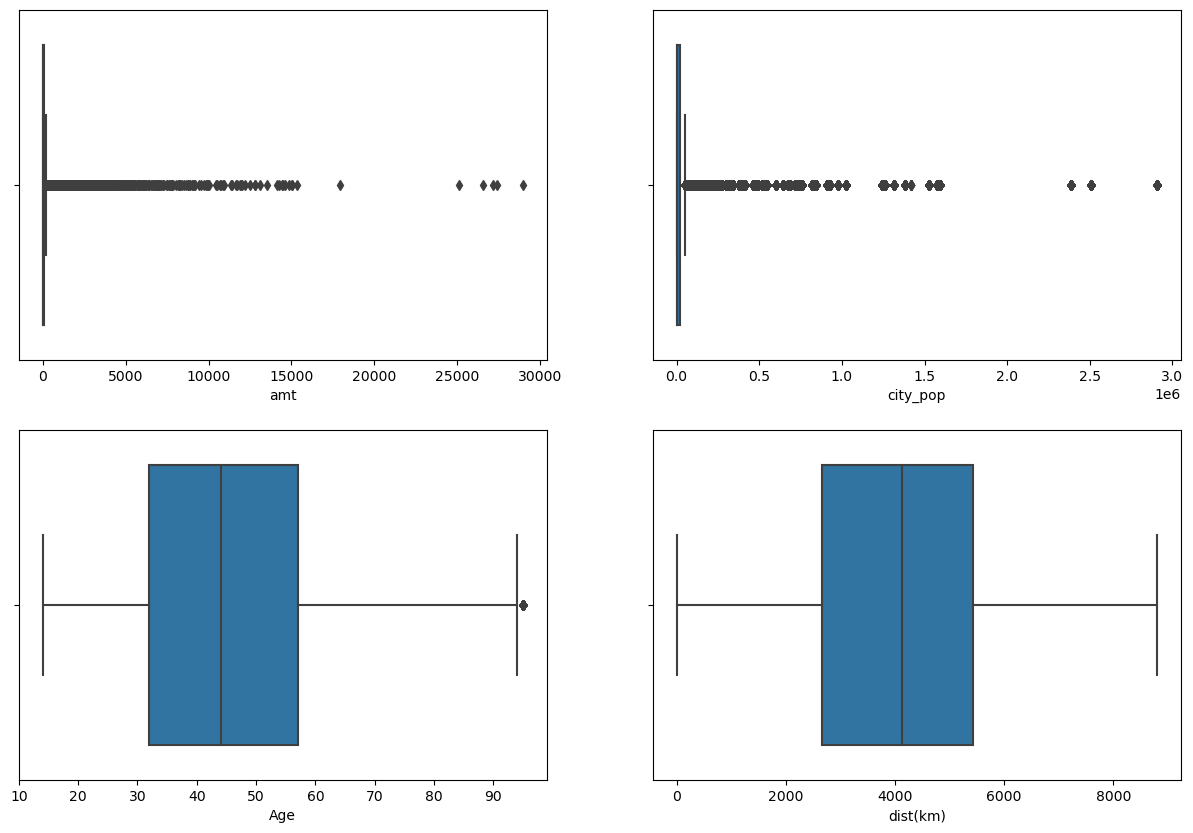

In [40]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(df.amt)

plt.subplot(2,2,2)
sns.boxplot(df.city_pop)

plt.subplot(2,2,3)
sns.boxplot(df.Age)

plt.subplot(2,2,4)
sns.boxplot(df["dist(km)"])

plt.show()

### Boxplot for Fraud data

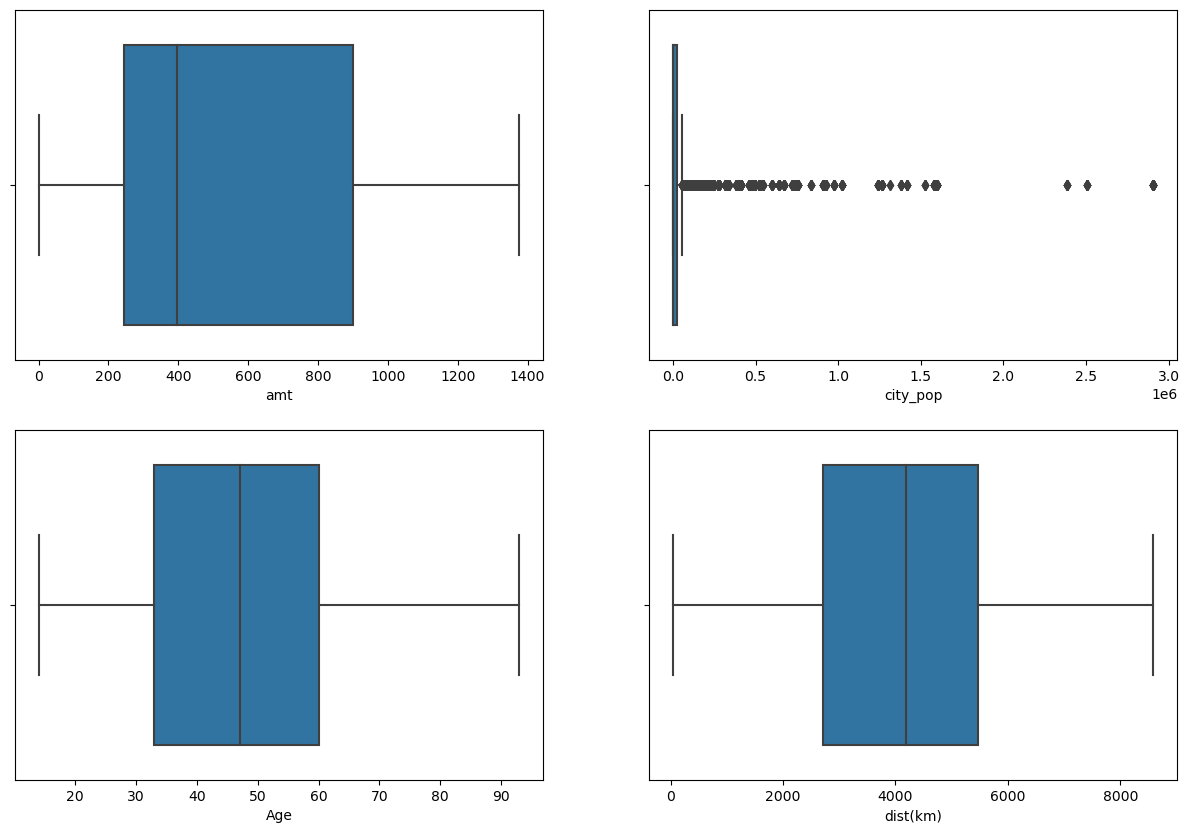

In [41]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(fraud_1.amt)

plt.subplot(2,2,2)
sns.boxplot(fraud_1.city_pop)

plt.subplot(2,2,3)
sns.boxplot(fraud_1.Age)

plt.subplot(2,2,4)
sns.boxplot(fraud_1["dist(km)"])

plt.show()

In [42]:
df.head(2)

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,Day,Hours,session,Age,dist(km),Age_range
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,Tuesday,0,Late Night,30,593.174456,Adult
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,Tuesday,0,Late Night,40,1728.704973,Midd Age Adult


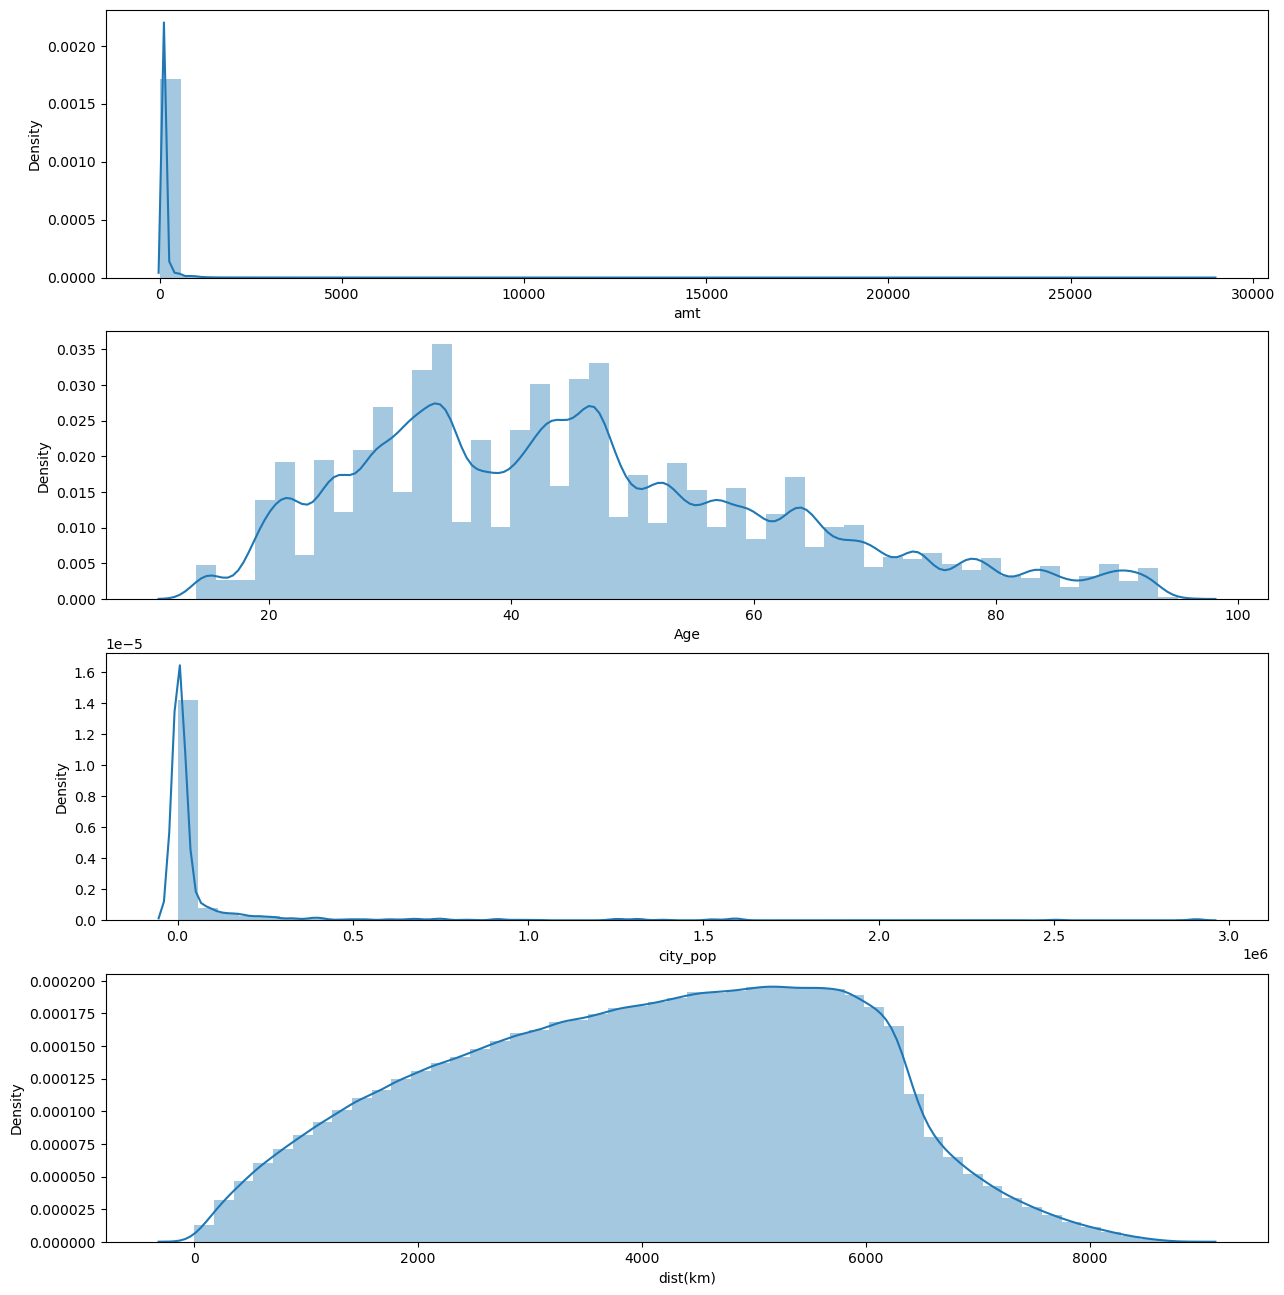

In [43]:
plt.figure(figsize=(15,16))

plt.subplot(4,1,1)
sns.distplot(df.amt)

plt.subplot(4,1,2)
sns.distplot(df.Age)

plt.subplot(4,1,3)
sns.distplot(df.city_pop)

plt.subplot(4,1,4)
sns.distplot(df["dist(km)"])

plt.show()

In [44]:
from scipy import stats

def diagnostic_plots (df, variable):
    #function to plot a histogram and a Q-Q plot #side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df [variable], dist="norm", plot=plt)
    plt.show()

### box-cox

#### Amount col

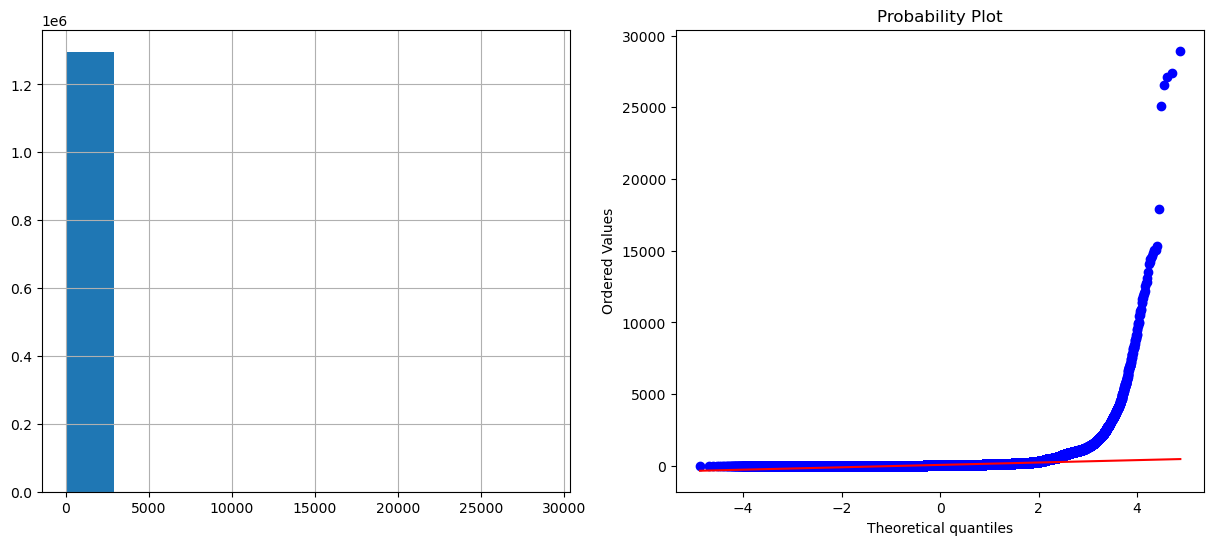

Optimal lambda:  0.09612774100181984


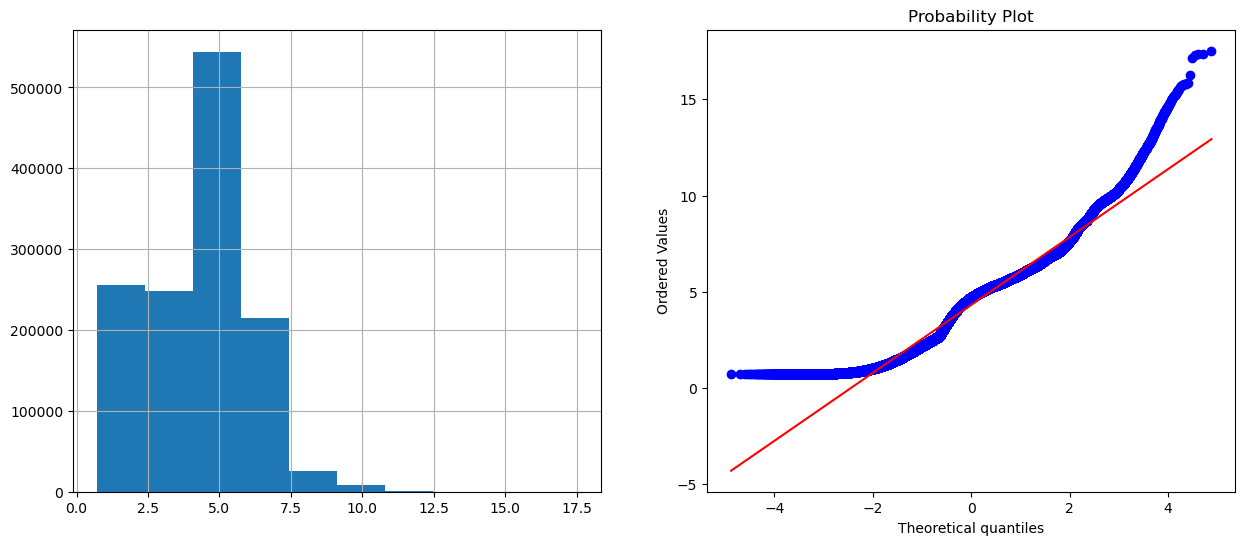

In [45]:
# befor box-cox method
diagnostic_plots (df, "amt")

# Afer box-cox method
df['amt_boxcox'], param = stats.boxcox(df.amt+1)
print("Optimal lambda: " , param)
diagnostic_plots (df, "amt_boxcox")

### City population

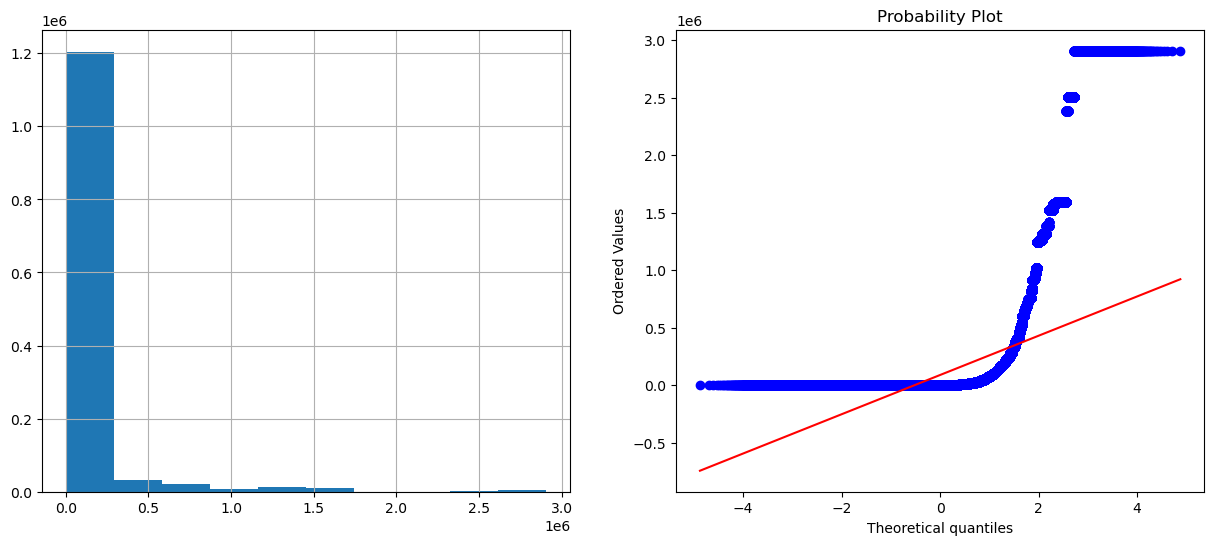

Optimal lambda:  0.09612774100181984


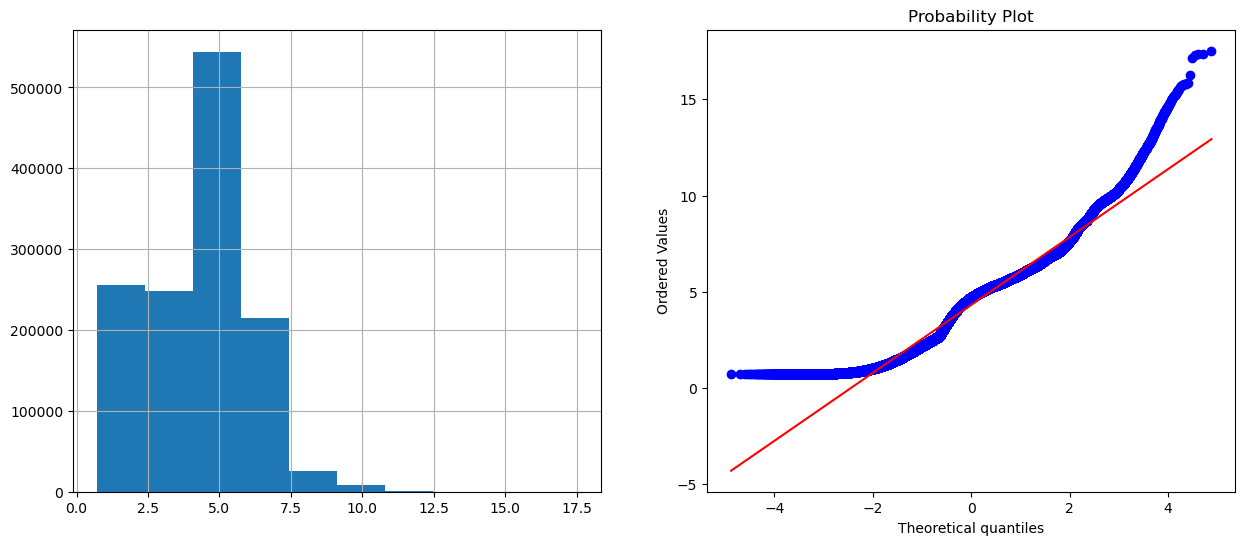

In [46]:
# befor box-cox method
diagnostic_plots (df, "city_pop")

# Afer box-cox method
df['city_pop_boxcox'], param = stats.boxcox(df.amt+1)
print("Optimal lambda: " , param)
diagnostic_plots (df, "city_pop_boxcox")

In [47]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'Day', 'Hours', 'session', 'Age', 'dist(km)',
       'Age_range', 'amt_boxcox', 'city_pop_boxcox'],
      dtype='object')

### Excluding top 10 merchant We replace all merchants with "Other"

In [48]:
df["gender"].replace({"M":0,"F":1},inplace=True)

In [49]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(df[['category','Day','session']], drop_first=True)

# Adding the results to the master dataframe

df = pd.concat([df, dummy1], axis=1)

In [50]:
df.head(2)

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,Day,Hours,session,Age,dist(km),Age_range,amt_boxcox,city_pop_boxcox,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,session_Early Morning,session_Morning,session_Noon,session_Evening,session_Night
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,1,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,Tuesday,0,Late Night,30,593.174456,Adult,1.949365,1.949365,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,1,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,Tuesday,0,Late Night,40,1728.704973,Midd Age Adult,5.916738,5.916738,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [51]:
df.drop(['trans_date_trans_time','merchant','category','amt','city','state','lat','long','city_pop','job',
         'dob','merch_lat','merch_long','Day','Hours','session','Age_range'],axis=1,inplace=True)

In [52]:
df.shape

(1296675, 30)

In [53]:
df.columns

Index(['gender', 'is_fraud', 'Age', 'dist(km)', 'amt_boxcox',
       'city_pop_boxcox', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday', 'session_Early Morning',
       'session_Morning', 'session_Noon', 'session_Evening', 'session_Night'],
      dtype='object')

# Test Data

In [54]:
df_test = pd.read_csv(r"C:\Users\gouri.mohite\ALL PROJECTS\PROJECTS EXCEL FILES\Credit card fraud\fraudTest.csv")
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [55]:
# Copy test data to d_test
d_test = df_test.copy()

In [56]:
df_test.shape

(555719, 23)

In [57]:
# Change datatype of column --> object with datetime

df_test["trans_date_trans_time"] = pd.to_datetime(df_test["trans_date_trans_time"], format='%Y-%m-%d %H:%M:%S.%f')

In [58]:
print(df_test["trans_date_trans_time"].dtype)

datetime64[ns]


In [59]:
# convert datetime into day name and create column Day

df_test["Day"] = df_test["trans_date_trans_time"].dt.day_name()
df_test["Day"]

0           Sunday
1           Sunday
2           Sunday
3           Sunday
4           Sunday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: Day, Length: 555719, dtype: object

In [60]:
# convert datetime into hours name and create column Hours

df_test["Hours"] = df_test["trans_date_trans_time"].dt.hour
df_test["Hours"]

0         12
1         12
2         12
3         12
4         12
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: Hours, Length: 555719, dtype: int64

In [61]:
df_test["Hours"].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [62]:
# Partitioning the day into 6 different sessions

time = [0,4,8,12,16,20,23]
session = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
df_test['session'] = pd.cut(df_test['Hours'], bins=time, labels=session, include_lowest=True)

In [63]:
df_test["session"]

0         Morning
1         Morning
2         Morning
3         Morning
4         Morning
           ...   
555714      Night
555715      Night
555716      Night
555717      Night
555718      Night
Name: session, Length: 555719, dtype: category
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Noon' < 'Evening' < 'Night']

In [64]:
df_test["trans_date_trans_time"].dt.year.unique()

array([2020], dtype=int64)

In [65]:
# here we drop columns which we could'nt require
df_test.drop(["Unnamed: 0","cc_num","first","last","street","trans_num","unix_time","zip",],axis=1,inplace=True)

In [66]:
df_test["dob"] = pd.to_datetime(df_test["dob"], format='%Y-%m-%d')

In [67]:
# calculating age from the column 'dob' and 'trans_date_trans_time'

df_test['Age'] = (df_test['trans_date_trans_time'].dt.year - df_test['dob'].dt.year) - ((df_test['trans_date_trans_time'].dt.month - df_test['dob'].dt.month) < 0)
df_test["Age"]

0         52
1         30
2         49
3         32
4         64
          ..
555714    54
555715    21
555716    39
555717    55
555718    27
Name: Age, Length: 555719, dtype: int64

In [68]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = df_test['lat'], df_test['long'], df_test['merch_lat'], df_test['merch_long']

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


df_test['dist(km)'] = \
    haversine(df_test.lat.shift(), df_test.long.shift(),
                 df_test.loc[1:, 'lat'], df_test.loc[1:, 'long'])

In [69]:
age = [13,19,39,59,80,100]
stages = ['Teen', 'Adult','Midd Age Adult','Senior Adult','Old Age']
df_test['Age_range'] = pd.cut(df_test['Age'], bins=age, labels=stages, include_lowest=True)

In [70]:
fraud_0 = df_test[df_test["is_fraud"] == 0]
fraud_1 = df_test[df_test["is_fraud"] == 1]

print("No. of fraud: ",fraud_1.shape[0])
print("No. of non-fraud: ",fraud_0.shape[0])

No. of fraud:  2145
No. of non-fraud:  553574


In [71]:
from scipy import stats

def diagnostic_plots (df_test, variable):
    #function to plot a histogram and a Q-Q plot #side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df_test[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df_test [variable], dist="norm", plot=plt)
    plt.show()

### box-cox

#### Amount col

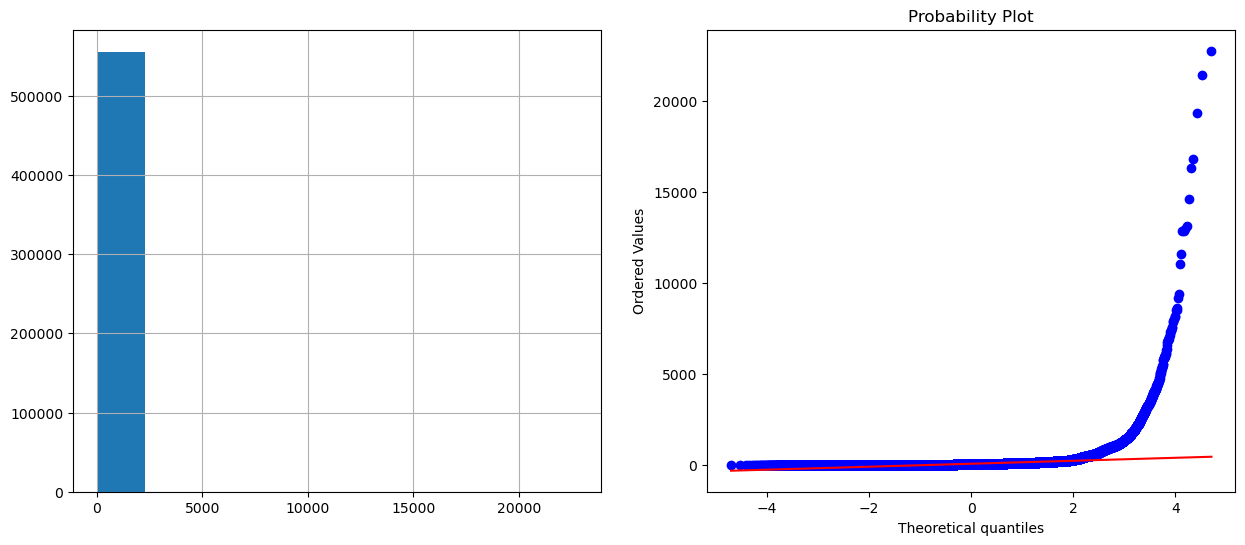

Optimal lambda:  0.10107129973536207


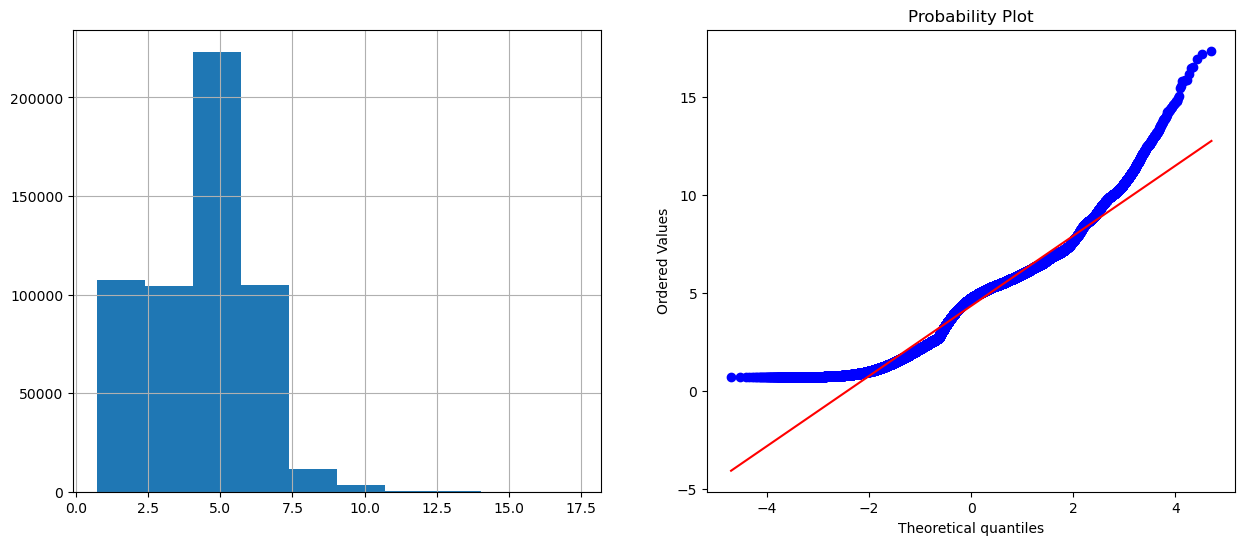

In [72]:
# befor box-cox method
diagnostic_plots (df_test, "amt")

# Afer box-cox method
df_test['amt_boxcox'], param = stats.boxcox(df_test.amt+1)
print("Optimal lambda: " , param)
diagnostic_plots (df_test, "amt_boxcox")

### City population

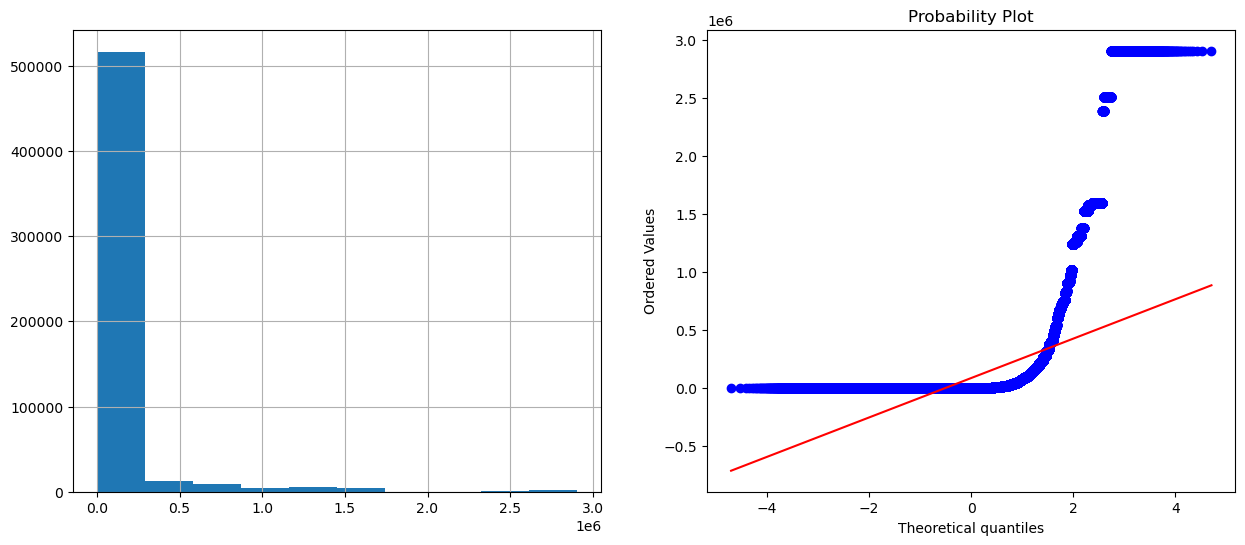

Optimal lambda:  0.10107129973536207


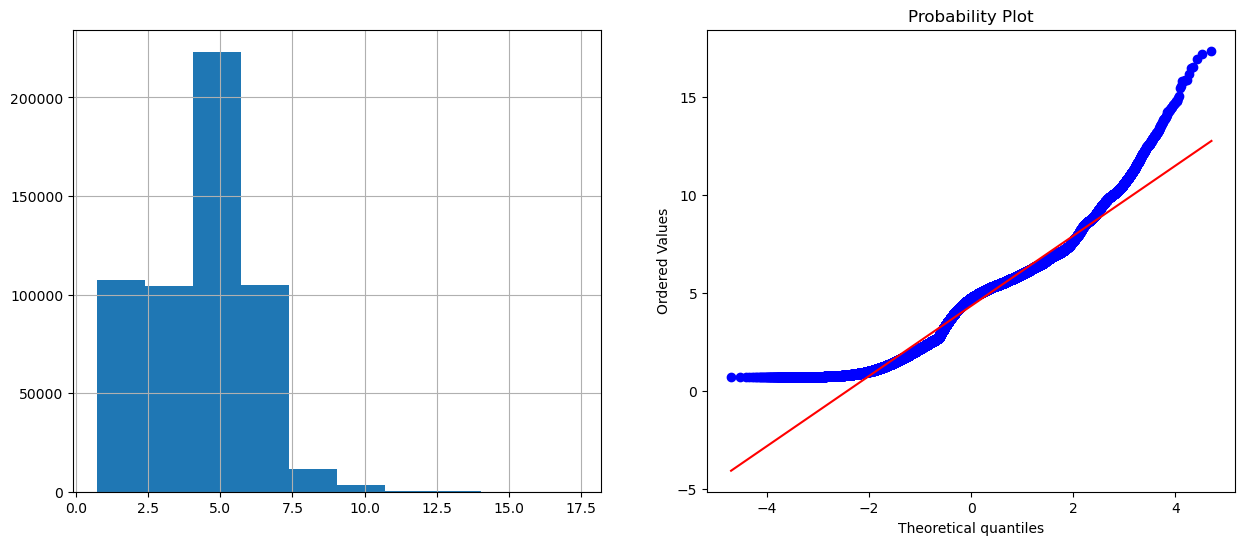

In [73]:
# befor box-cox method
diagnostic_plots (df_test, "city_pop")

# Afer box-cox method
df_test['city_pop_boxcox'], param = stats.boxcox(df_test.amt+1)
print("Optimal lambda: " , param)
diagnostic_plots (df_test, "city_pop_boxcox")

In [74]:
df_test.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'Day', 'Hours', 'session', 'Age', 'dist(km)',
       'Age_range', 'amt_boxcox', 'city_pop_boxcox'],
      dtype='object')

In [75]:
df_test["gender"].replace({"M":0,"F":1},inplace=True)

In [76]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_test[['category','Day','session']], drop_first=True)

# Adding the results to the master dataframe
df_test = pd.concat([df_test, dummy1], axis=1)

In [77]:
df_test.head(2)

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,Day,Hours,session,Age,dist(km),Age_range,amt_boxcox,city_pop_boxcox,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,session_Early Morning,session_Morning,session_Noon,session_Evening,session_Night
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,0,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,Sunday,12,Morning,52,1416.796144,Midd Age Adult,1.447202,1.447202,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,1,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,Sunday,12,Morning,30,5686.866950,Adult,4.097965,4.097965,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [78]:
df_test.drop(['trans_date_trans_time','merchant','category','amt','city','state','lat','long','city_pop','job',
         'dob','merch_lat','merch_long','Day','Hours','session','Age_range'],axis=1,inplace=True)

In [79]:
df_test.shape

(555719, 30)

In [80]:
df_test.columns

Index(['gender', 'is_fraud', 'Age', 'dist(km)', 'amt_boxcox',
       'city_pop_boxcox', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday', 'session_Early Morning',
       'session_Morning', 'session_Noon', 'session_Evening', 'session_Night'],
      dtype='object')

# Train Test Split

In [81]:
X = df.drop('is_fraud',1)
X.head()

,gender,Age,dist(km),amt_boxcox,city_pop_boxcox,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,session_Early Morning,session_Morning,session_Noon,session_Evening,session_Night
0,1,30,593.174456,1.949365,1.949365,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,40,1728.704973,5.916738,5.916738,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,57,6172.384834,7.076843,7.076843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,52,5643.930319,4.628194,4.628194,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,32,3759.275670,4.529728,4.529728,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [82]:
X.shape

(1296675, 29)

In [83]:
X.columns

Index(['gender', 'Age', 'dist(km)', 'amt_boxcox', 'city_pop_boxcox',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday', 'session_Early Morning',
       'session_Morning', 'session_Noon', 'session_Evening', 'session_Night'],
      dtype='object')

In [84]:
X1 = df_test.drop('is_fraud',1)
X1.head()

,gender,Age,dist(km),amt_boxcox,city_pop_boxcox,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,session_Early Morning,session_Morning,session_Noon,session_Evening,session_Night
0,0,52,1416.796144,1.447202,1.447202,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,30,5686.866950,4.097965,4.097965,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1,49,4207.717100,4.551333,4.551333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,32,1590.150812,5.097792,5.097792,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,64,6141.936388,1.541625,1.541625,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [85]:
X1.shape

(555719, 29)

In [86]:
X1.columns

Index(['gender', 'Age', 'dist(km)', 'amt_boxcox', 'city_pop_boxcox',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday', 'session_Early Morning',
       'session_Morning', 'session_Noon', 'session_Evening', 'session_Night'],
      dtype='object')

In [87]:
Y = df['is_fraud']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [88]:
Y1 = df_test['is_fraud']
Y1.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [89]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [90]:
#perform oversampling using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 100,sampling_strategy = 1.0)

X_smo, Y_smo =  sm.fit_resample(X,Y)

In [91]:
print(X_smo.shape,Y_smo.shape)

(2578338, 29) (2578338,)


Text(0.5, 1.0, 'Fraud')

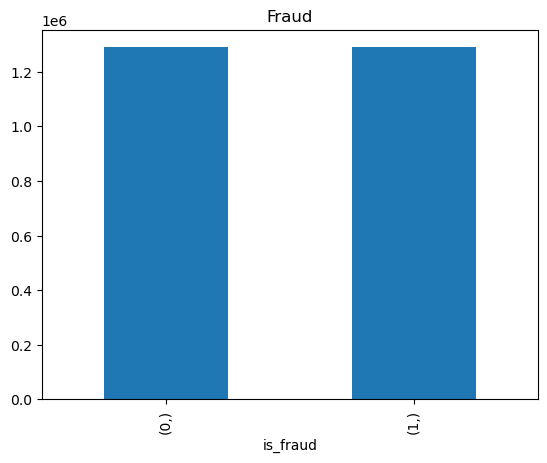

In [92]:
pd.DataFrame(Y_smo).value_counts().plot(kind='bar').set_title('Fraud')

In [93]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = X_smo, X1, Y_smo, Y1

In [94]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2578338, 29) (555719, 29) (2578338,) (555719,)


### Scale Data

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [96]:
# transform test using the already fit scaler
X_test = scaler.transform(X_test)

## Feature Selection

### Recursive Feature Elimination

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
LR = LogisticRegression(class_weight='balanced')
rfe = RFE(estimator=LR, n_features_to_select=15)

rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(class_weight='balanced'),
    n_features_to_select=15)

In [98]:
rfe.ranking_

array([13, 15, 14,  1,  1,  1,  2,  1,  5,  1,  1,  1,  3,  1,  1,  4,  1,
        1,  8, 11,  9, 10,  6,  7,  1,  1,  1,  1, 12])

In [99]:
rfe.support_

array([False, False, False,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True, False])

In [100]:
pd.DataFrame(X_train).columns[rfe.support_]

Int64Index([3, 4, 5, 7, 9, 10, 11, 13, 14, 16, 17, 24, 25, 26, 27], dtype='int64')

In [101]:
a=list(X.columns[rfe.support_])
a

['amt_boxcox',
 'city_pop_boxcox',
 'category_food_dining',
 'category_grocery_net',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_pos',
 'category_travel',
 'session_Early Morning',
 'session_Morning',
 'session_Noon',
 'session_Evening']

In [102]:
X_train_df = pd.DataFrame(X_train).loc[:,rfe.support_]

In [103]:
X_train_df.head()

,3,4,5,7,9,10,11,13,14,16,17,24,25,26,27
0,0.073333,0.073333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.309368,0.309368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.378388,0.378388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.232707,0.232707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.226849,0.226849,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
X_train_df.columns= a
X_train_df.head()

,amt_boxcox,city_pop_boxcox,category_food_dining,category_grocery_net,category_health_fitness,category_home,category_kids_pets,category_misc_pos,category_personal_care,category_shopping_pos,category_travel,session_Early Morning,session_Morning,session_Noon,session_Evening
0,0.073333,0.073333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.309368,0.309368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.378388,0.378388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.232707,0.232707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.226849,0.226849,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
X_test_df = pd.DataFrame(X_test).loc[:,rfe.support_]

In [106]:
X_test_df.columns = a
X_test_df.head()

,amt_boxcox,city_pop_boxcox,category_food_dining,category_grocery_net,category_health_fitness,category_home,category_kids_pets,category_misc_pos,category_personal_care,category_shopping_pos,category_travel,session_Early Morning,session_Morning,session_Noon,session_Evening
0,0.043457,0.043457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.201162,0.201162,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.228135,0.228135,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.260646,0.260646,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.049075,0.049075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Modeling: Logistic Regression

In [107]:
#import library and fit train model on train data
#class_weight="balanced":it basically means replicating the smaller class until you have as many samples as in the larger one, 
#but in an implicit way.Though we have already used smote but here we can use this too.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LR = LogisticRegression(class_weight='balanced')
LR.fit(X_train_df,y_train)

LogisticRegression(class_weight='balanced')

In [108]:
#making predictions using the train data
y_train_pred_lr = LR.predict(X_train_df)

#making predictions using the test data
y_test_pred_lr = LR.predict(X_test_df)

* ROC : Receiver operating characteristic curve
      --> which is used to measure the performance of model 

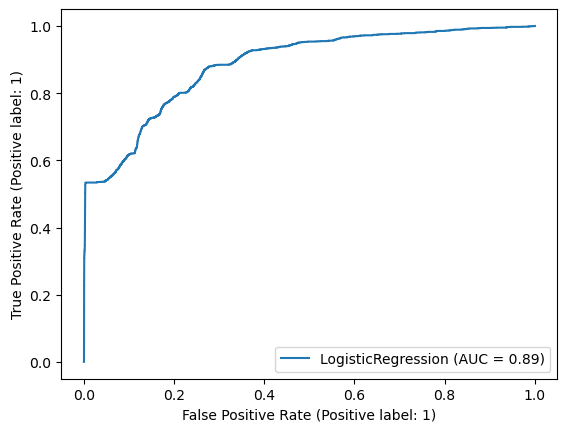

In [109]:
metrics.plot_roc_curve(LR, X_test_df, y_test)

In [110]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [111]:
#creating the confusion matrix for the train data
print("TRAIN DATA :-\n")
confusion_tree = confusion_matrix(y_train, y_train_pred_lr)

TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy:', accuracy_score(y_train, y_train_pred_lr))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('Precision:', TP/float(TP+FP))
print('Recall:', TP/float(TP+ FN))

TRAIN DATA :-

Acuracy: 0.9181872198292078
Sensitivity: 0.9542232244182105
Specificity: 0.8821512152402051
Precision: 0.890073816170097
Recall: 0.9542232244182105


In [112]:
#creating the confusion matrix for the test data
print("TEST DATA :-\n")
confusion_tree = confusion_matrix(y_test, y_test_pred_lr)

TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy:', accuracy_score(y_test, y_test_pred_lr))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('Precision:', TP/float(TP+FP))
print('Recall:', TP/float(TP+ FN))

TEST DATA :-

Acuracy: 0.8807850730315141
Sensitivity: 0.6484848484848484
Specificity: 0.8816851947526437
Precision: 0.02079626833315891
Recall: 0.6484848484848484


## Modeling: Decision Tree

In [113]:
#creating a decision tree with the default parameters (except class_weight and max_depth)
#keeping the depth as a small number so as to control overfitting
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(class_weight = "balanced", max_depth = 10) 
#use of balanced in class weight:  it basically means replicating the smaller classes until we have as many samples as in the larger one, but in an implicit way
DT.fit(X_train_df,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10)

In [114]:
#making predictions using the train data
y_train_pred_dt = DT.predict(X_train_df)

#making predictions using the test data
y_test_pred_dt = DT.predict(X_test_df)

In [115]:
y_train_pred_dt.shape

(2578338,)

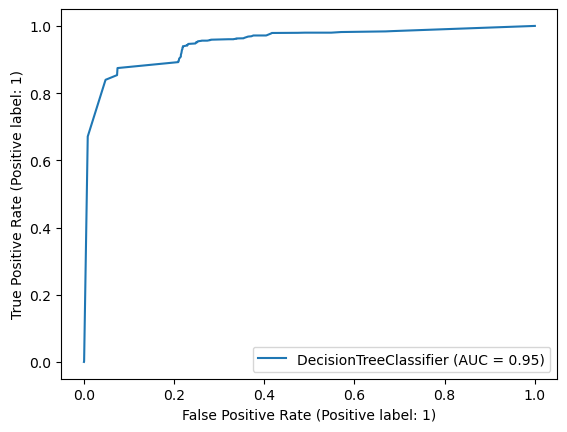

In [116]:
metrics.plot_roc_curve(DT, X_test_df, y_test)

In [117]:
#creating the confusion matrix for the train data
print("TRAIN DATA :-\n")
confusion_tree = confusion_matrix(y_train, y_train_pred_dt)

TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy:', accuracy_score(y_train, y_train_pred_dt))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('Precision:', TP/float(TP+FP))
print('Recall:', TP/float(TP+ FN))

TRAIN DATA :-

Acuracy: 0.9118098558063372
Sensitivity: 0.8940875866546589
Specificity: 0.9295321249580156
Precision: 0.9269426405838477
Recall: 0.8940875866546589


In [118]:
#creating the confusion matrix for the test data
print("TEST DATA :-\n")
confusion_tree = confusion_matrix(y_test, y_test_pred_dt)

TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy:', accuracy_score(y_test, y_test_pred_dt))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('Precision:', TP/float(TP+FP))
print('Recall:', TP/float(TP+ FN))

TEST DATA :-

Acuracy: 0.9254677273946005
Sensitivity: 0.8699300699300699
Specificity: 0.9256829258599573
Precision: 0.04338929451704413
Recall: 0.8699300699300699


## Modeling:  RandomForest 

In [119]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=50,
                            max_depth=10,
                            min_samples_leaf=5,
                            n_jobs=-1,verbose=1,
                            class_weight='balanced',
                            random_state=100)

#fitting the data
RF.fit(X_train_df, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.0s finished


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=50, n_jobs=-1,
                       random_state=100, verbose=1)

In [120]:
#making predictions using the train data
y_train_pred_rf = RF.predict(X_train_df)

#making predictions using the test data
y_test_pred_rf = RF.predict(X_test_df)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    3.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.6s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.6s finished


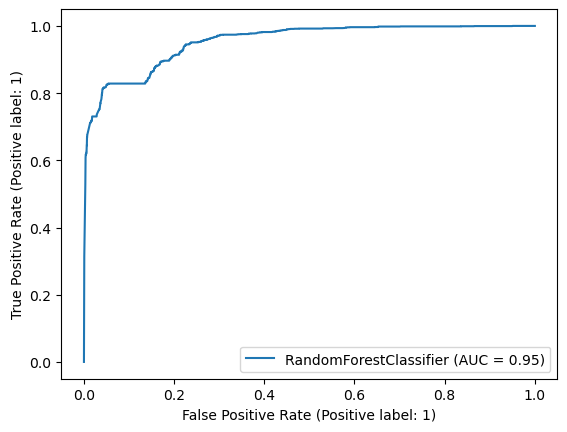

In [121]:
metrics.plot_roc_curve(RF, X_test_df, y_test)

In [122]:
#creating the confusion matrix for the train data
print("TRAIN DATA :-\n")
confusion_tree = confusion_matrix(y_train, y_train_pred_rf)

TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy:', accuracy_score(y_train, y_train_pred_rf))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('Precision:', TP/float(TP+FP))
print('Recall:', TP/float(TP+ FN))

TRAIN DATA :-

Acuracy: 0.9237931566768981
Sensitivity: 0.885707769888975
Specificity: 0.9618785434648212
Precision: 0.958735385886486
Recall: 0.885707769888975


In [123]:
#creating the confusion matrix for the test data
print("TEST DATA :-\n")
confusion_tree = confusion_matrix(y_test, y_test_pred_rf)

TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy:', accuracy_score(y_test, y_test_pred_rf))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('Precision:', TP/float(TP+FP))
print('Recall:', TP/float(TP+ FN))

TEST DATA :-

Acuracy: 0.9587255429452655
Sensitivity: 0.8065268065268065
Specificity: 0.9593152857612532
Precision: 0.07133432294243773
Recall: 0.8065268065268065


## Modeling:  XGBoost

In [125]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 99.7/99.7 MB 4.9 MB/s eta 0:00:00


In [126]:
from xgboost import XGBClassifier
XG = XGBClassifier()

#fitting the data
XG.fit(X_train_df,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [127]:
#making predictions using the train data
y_train_pred_xg = XG.predict(X_train_df)

#making predictions using the test data
y_test_pred_xg = XG.predict(X_test_df)

In [128]:
y_train_pred_xg.shape

(2578338,)

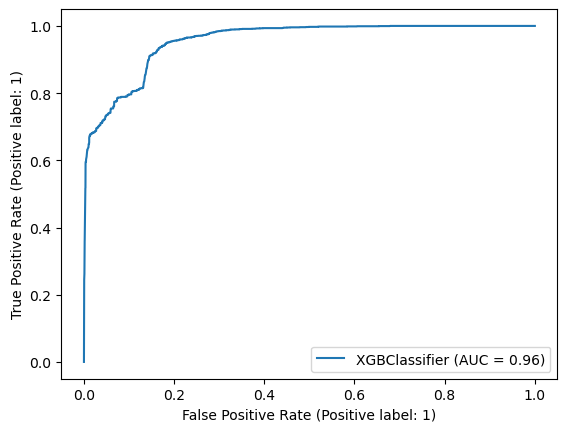

In [129]:
metrics.plot_roc_curve(XG, X_test_df, y_test)

In [130]:
#creating the confusion matrix for the train data
print("TRAIN DATA :-\n")
confusion_tree = confusion_matrix(y_train, y_train_pred_xg)

TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy:', accuracy_score(y_train, y_train_pred_xg))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('Precision:', TP/float(TP+FP))
print('Recall:', TP/float(TP+ FN))

TRAIN DATA :-

Acuracy: 0.9368569985781539
Sensitivity: 0.9427685586606566
Specificity: 0.930945438495651
Precision: 0.9317523387950577
Recall: 0.9427685586606566


In [131]:
#creating the confusion matrix for the test data
print("TEST DATA :-\n")
confusion_tree = confusion_matrix(y_test, y_test_pred_xg)

TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy:', accuracy_score(y_test, y_test_pred_xg))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('Precision:', TP/float(TP+FP))
print('Recall:', TP/float(TP+ FN))

TEST DATA :-

Acuracy: 0.928316289347674
Sensitivity: 0.7752913752913753
Specificity: 0.9289092334538833
Precision: 0.04054416461467197
Recall: 0.7752913752913753


In [132]:
# Creating a dataframe to compare the actual v/s predicted values of y:

y_test_pred_xg = pd.Series(y_test_pred_xg)
df_pred = pd.concat([X_test_df, y_test,y_test_pred_xg], axis = 1)
df_pred.rename(columns = {0:'y_pred'}, inplace = True)
df_pred.head()

,amt_boxcox,city_pop_boxcox,category_food_dining,category_grocery_net,category_health_fitness,category_home,category_kids_pets,category_misc_pos,category_personal_care,category_shopping_pos,category_travel,session_Early Morning,session_Morning,session_Noon,session_Evening,is_fraud,y_pred
0,0.043457,0.043457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
1,0.201162,0.201162,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
2,0.228135,0.228135,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
3,0.260646,0.260646,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
4,0.049075,0.049075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0


In [133]:
df_pred.tail()

,amt_boxcox,city_pop_boxcox,category_food_dining,category_grocery_net,category_health_fitness,category_home,category_kids_pets,category_misc_pos,category_personal_care,category_shopping_pos,category_travel,session_Early Morning,session_Morning,session_Noon,session_Evening,is_fraud,y_pred
555714,0.233120,0.233120,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
555715,0.317777,0.317777,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
555716,0.294097,0.294097,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
555717,0.103648,0.103648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
555718,0.221435,0.221435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [134]:
# Extracting only the fraudulent transactions from this test dataset:

fraud_df = df_pred[df_pred.is_fraud==1]
fraud_df.head()

,amt_boxcox,city_pop_boxcox,category_food_dining,category_grocery_net,category_health_fitness,category_home,category_kids_pets,category_misc_pos,category_personal_care,category_shopping_pos,category_travel,session_Early Morning,session_Morning,session_Noon,session_Evening,is_fraud,y_pred
1685,0.186411,0.186411,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1767,0.522811,0.522811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1781,0.496363,0.496363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1784,0.561020,0.561020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1857,0.531769,0.531769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1


# Cost Benefit Analysis
* The Cost Benefit Analysis is to be done on the original data
* Merging the train and test data to make an original dataframe

In [135]:
# Let us merge the dataset to form the original

fraud = pd.concat([d_train, d_test], axis=0)
fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Let us take a look at what we need to do in order to perform the cost-benefit analysis step by step:
##### Part I: Analyse the dataset and find the following figures:
* Average number of transactions per month
* Average number of fraudulent transactions per month
* Average amount per fraudulent transaction

In [136]:
# Since the given (original) dataset is from Jan 1 2019 to Dec 31 2020, the data is of 24 months
# Total transactions can be found by checking the shape of the original dataframe
# Avg transactions per month would be to divide that shape/total by 24 (months)

Avg_transactions_pm = fraud.shape[0]//24
print("1] Average number of transactions per month are :- ",Avg_transactions_pm)

1] Average number of transactions per month are :-  77183


In [137]:
# Checking only for fraudulent transactions:

fraud[fraud.is_fraud == 1]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,517197,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1
517274,517274,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1
517341,517341,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1
517529,517529,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1


In [138]:
# Fraudulent transactions are 9651 (number of rows) that are spread across 24 months
# Avg fraudulent transactions per month would be to divide the shape/total fraudulent rows by 24 (months)

Avg_fraud_transaction_pm = fraud[fraud.is_fraud == 1].shape[0]//24
print("2] Average number of fraudulent transactions per month are :- ",Avg_fraud_transaction_pm)

2] Average number of fraudulent transactions per month are :-  402


In [139]:
# Average amount of fraud is the total fraudulent amount divided by the total number of fraudulent transactions

Avg_fraud_amt = fraud[fraud.is_fraud == 1].amt.sum()//fraud[fraud.is_fraud == 1].shape[0]
print("3] Average amount per fraudulent transactions is :- ", Avg_fraud_amt)

3] Average amount per fraudulent transactions is :-  530.0


### Part II: Compare the cost incurred per month by the bank before and after the model deployment:
1. Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month
2. Cost incurred per month after the model is built and deployed: (Use the test metric from the model evaluation part and the calculations performed in Part I to compute the values given below)
* Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = USD 1.5

* Total cost of providing customer support per month for fraudulent transactions detected by the model = 1.5 * TF.

* Let FN be the average number of transactions per month that are fraudulent but not detected by the model

* Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN

* Therefore, the cost incurred per month after the model is built and deployed = 1.5 * TF + Average amount per fraudulent transaction * FN

* Final savings = Cost incurred before - Cost incurred after

In [140]:
# Calculating the cost incurred before deploying the model based on the first point descibed above:

Cost_before_model = Avg_fraud_amt*Avg_fraud_transaction_pm
print("Cost incurred before deploying the model :- " ,Cost_before_model)

Cost incurred before deploying the model :-  213060.0


In [141]:
# Let TF be the average number of transactions per month detected as fraudulent by the model 
# Since the test dataframe has 7 months data, dividing by 7

TF = fraud_df.y_pred.sum()//7
print("Total cost of providing customer support per month for fraudulent transactions detected by the model =", TF*1.5)

Total cost of providing customer support per month for fraudulent transactions detected by the model = 355.5


In [142]:
# Let FN be the average number of transactions per month that are fraudulent but not detected by the model
# Since the test dataframe has 7 months data, dividing by 7

FN = fraud_df[fraud_df.y_pred==0].is_fraud.sum()//7
print("Cost incurred due to these fraudulent transactions left undetected by the model =", FN*Avg_fraud_amt)

Cost incurred due to these fraudulent transactions left undetected by the model = 36040.0


In [143]:
# Cost incurred after the model is deployed:

Cost_after_model = (TF*1.5) + (FN*Avg_fraud_amt)
Cost_after_model

36395.5

In [144]:
# Final savings = Cost incurred before - Cost incurred after

Final_Savings = int(Cost_before_model - Cost_after_model)
print("Final Savings after deploying the model are: $",Final_Savings)

Final Savings after deploying the model are: $ 176664
